(sec:planck)=
# Integrating the Planck function with python

## Using ipython magic commands

When you start a jupyter notebook with python (instead of R, Julia, Rust etc.) you
get access to the ipython interactive environment, which can also be run outside
Jupyter (and was developed before Jupyter existed).  One feature of ipython is
"magic" commands:

[IPython magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

You can use these to start the debugger, output cells to files, etc.  We've already
seen

    %debug

Below I'll use %%file output a cell to a file for later use as a module

In [1]:
%magic --brief

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Write a module to compute Stull 2.13

Save this to a file called "radiation.py" in this folder

In [3]:
%%file radiation.py
import numpy as np
#
# get Stull's c_1 and c_2 from fundamental constants
#
# c=2.99792458e+08  #m/s -- speed of light in vacuum
# h=6.62606876e-34  #J s  -- Planck's constant
# k=1.3806503e-23  # J/K  -- Boltzman's constant

c, h, k = 299_792_458.0, 6.626_070_04e-34, 1.380_648_52e-23
c1 = 2.0 * h * c ** 2.0
c2 = h * c / k
sigma = 2.0 * np.pi ** 5.0 * k ** 4.0 / (15 * h ** 3.0 * c ** 2.0)
print(sigma)


def Elambda(wavel, Temp):
    """
    Calculate the blackbody radiant exitence (Stull 2.13)

    Parameters
    ----------

      wavel: float or array
           wavelength (meters)

      Temp: float
           temperature (K)

    Returns
    -------

    Elambda:  float or arr
           monochromatic radiant exitence (W/m^2/m)
    """
    Elambda_val = c1 * np.pi / (wavel ** 5.0 * (np.exp(c2 / (wavel * Temp)) - 1))
    return Elambda_val

Overwriting radiation.py


## import the function from that file and use it

5.670366816083269e-08
reading function from /home/phil/repos/a301_2020/notebooks/week2/radiation.py


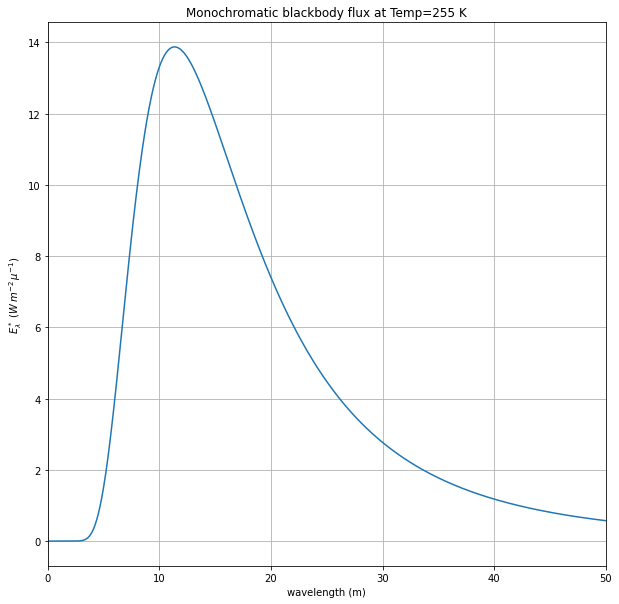

In [4]:
import radiation
from radiation import Elambda

print(f"reading function from {radiation.__file__}")

npoints = 10000
Temp = 255  # K
wavelengths = np.linspace(0.1, 500.0, npoints) * 1.0e-6  # meters
Estar = Elambda(wavelengths, Temp)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(wavelengths * 1.0e6, Estar * 1.0e-6)
ax.set(xlim=[0, 50])
ax.grid(True)
ax.set(
    xlabel="wavelength (m)",
    ylabel="$E_\lambda^*\ (W\,m^{-2}\,\mu^{-1}$)",
    title=f"Monochromatic blackbody flux at Temp={Temp} K",
);

[Text(0.5, 0, 'wavelength (m)'),
 Text(0, 0.5, '$L_\\lambda^*\\ (W\\,m^{-2}\\,sr^{-1}\\,\\mu^{-1}$)'),
 Text(0.5, 1.0, 'Monochromatic blackbody radiance at Temp=255 K')]

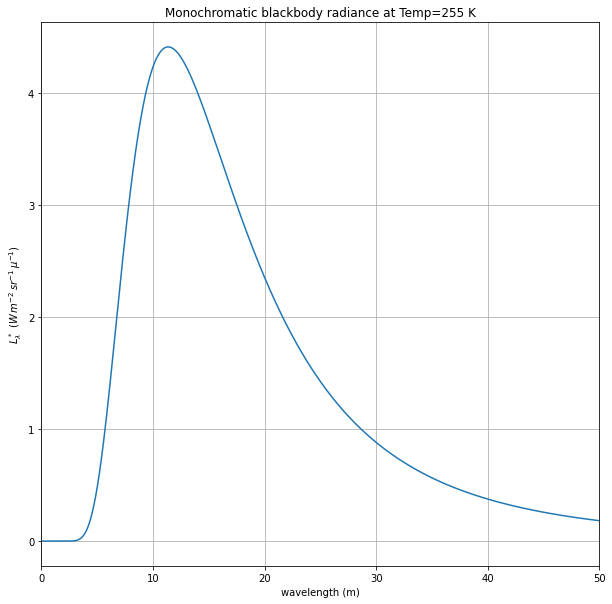

In [5]:
Lstar = Estar / np.pi
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(wavelengths * 1.0e6, Lstar * 1.0e-6)
ax.set(xlim=[0, 50])
ax.grid(True)
ax.set(
    xlabel="wavelength (m)",
    ylabel="$L_\lambda^*\ (W\,m^{-2}\,sr^{-1}\,\mu^{-1}$)",
    title=f"Monochromatic blackbody radiance at Temp={Temp} K",
)